# Tutorial 7: Singular Value Decomposition


**Singular Value Decomposition** has many applications, such as pseudoinverse (inverse of any matrix, including non-invertible matrices), matrix approximation (can be used for digital image compression), representation of four fundamental subspaces (column/row/null/leftnull), signal processing, and point cloud alignment.


A square matrix $A \in \mathbb{R}^{nxn}$ is diagonalizable if and only if there exists an invertible square matrix $P \in \mathbb{R}^{nxn}$ such that $P^{-1}AP$ is a diagonal matrix. This is equivalent to the condition that all eigenvectors are linearly independent, which means that the matrix has an eigenbasis - a basis of eigenvectors.

A similar concept to the diagonalization of square matrices ($A = PDP^{-1}$) is **Singular Value Decomposition**. However, it works for rectangular matrices as well, and has many more applications and properties than diagonalization. SVDs are in the form: $A = U\Sigma V^T$


#### Singular Value Decomposition


We use the notation $\sigma(M)$ for a set of eigenvalues for a matrix $M$.


Consider an $m \times n$ matrix $A$ and the matrix $M = A^TA \in \mathbb{R}^{n \times n}$.

The transpose of this matrix is: $(A^TA)^T = A^T (A^T)^T = A^T A$, so it is symmetric ($M^T = M$). **Therefore, the eigenvalues of this matrix are real.** That is, for all $\lambda_i \in \sigma(M), \lambda_i \in \mathbb{R}$. Or, by set inclusion, $\sigma(M) \subseteq \mathbb{R}$.

Also, it is semi-definite: $x^T M x = x^T (A^T A) x = (Ax)^T (Ax) = Ax \cdot Ax = ||Ax||^2 \geq 0$. **Therefore, the eigenvalues of the matrix are non-negative.** That is, for all $\lambda_i \in \sigma(M), \lambda_i \geq 0$.


Since the eigenvalues of this matrix are real and non-negative, we can define singular values as follows:


For $i = 1, ..., \min(m,n)$, we have $\lambda_i \in \sigma(M),$ such that $\sigma_i = \sqrt{\lambda_i}$. That is, the **singular values of a matrix A are the square roots of the eigenvalues of $A^T A$**.


$\Sigma = diag(\sigma _1,..., \sigma_k) \in \mathbb{R}^{m \times n}$ where $k = \min(m,n)$. Note that $\Sigma$ is m by n, but it a diagonal matrix

The columns of V are the normalized eigenvectors of M: $\hat{x_1}, ..., \hat{x_n}$. There are $n$ many $V$ columns.

The columns of U are defined as follows: $u_i = \frac{1}{\sigma_i} (A v_i) $. There are $m$ many $V$ columns ($V^T$ rows).


## Exercise 1: SVD Example


Compute the SVD for $$A = \begin{bmatrix}
   1 & 0 & -1 \\
   1 & 1 & 1
\end{bmatrix}$$


Transpose is $$A^T = \begin{bmatrix}
   1 & 1 \\
   0 & 1 \\
   -1 & 1
\end{bmatrix}$$


$$
M = A^T A = \begin{bmatrix}
   2 & 1 & 0 \\
   1 & 1 & 1 \\
   0 & 1 & 2
\end{bmatrix}
$$


Eigenvalues and eigenvectors of $M$ are:

$\lambda_1 = 3, x_1 = [1,1,1]^T$

$\lambda_2 = 2, x_2 = [-1,0,1]^T$

$\lambda_3 = 0, x_3 = [1, -2, 1]^T$


Singular values: $\sigma_1 = \sqrt{3}$, $\sqrt{2}$, so:


$$
\Sigma =
\begin{bmatrix}
   \sqrt{3} & 0 & 0\\
   0 & \sqrt{2} & 0
\end{bmatrix}
$$


By normalizing the previous eigenvectors and including them as columns of V, we get:


$$
V = \begin{bmatrix}
   \frac{1}{\sqrt{3}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} \\
   \frac{1}{\sqrt{3}} & 0 & -\frac{2}{\sqrt{6}} \\
   \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}}
\end{bmatrix}
$$


$$
V^{T}=
\begin{bmatrix}
    \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}}\\
    -\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
    \frac{1}{\sqrt{6}} & -\frac{2}{\sqrt{6}} & \frac{1}{\sqrt{6}}
\end{bmatrix}
$$


Using the formula $u_i = \frac{1}{\sigma_i} (A v_i) $, we have:


$$
U =
\begin{bmatrix}
   0 & -1 \\
   1 & 0
\end{bmatrix}
$$


$$
A = U\Sigma V^T =
\begin{bmatrix}
   0 & -1 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   \sqrt{3} & 0 & 0\\
   0 & \sqrt{2} & 0
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}}\\
    -\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
    \frac{1}{\sqrt{6}} & -\frac{2}{\sqrt{6}} & \frac{1}{\sqrt{6}}
\end{bmatrix}
$$


Interesting fact: the first two (rank = 2) columns of $V$ are the basis for $col(A)$ (column space), and the rest (last col) is the basis for $null(A^T)$ (left-null space). The first two rows of $U^T$ are the basis for $row(A)$ (row space) and the rest (none) are the basis for $null(A)$ (null space). These are the four fundamental subspaces of A, and they can be obtained all at the same time by finding the SVD of A.


Note that finding only the first $\min(m,n)$ singular values and columns of $U,V$ (or rows of $V^T$) is a form of **reduced SVD** referred to as the **thin SVD**. This can save a lot of computation time and space if the difference between m and n is large. There is another form of reduced SVD called **truncated SVD**, which is used to provide a **low-rank matrix approximation** which sometimes requires fewer bytes to store (data compression). Here is the "thin SVD" version of our SVD:


$$
A = U\Sigma V^T =
\begin{bmatrix}
   0 & -1 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   \sqrt{3} & 0 \\
   0 & \sqrt{2} \\
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}} & \frac{1}{\sqrt{3}}\\
    -\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}
\end{bmatrix}
$$


Julia computes the thin SVD by default:


In [27]:
using LinearAlgebra
A = [1 0 -1;
    1 1 1];
display(A)
U, S, V = svd(A);
display(U);
display(diagm(S));
display(V')

display(U * diagm(S) * V')

2×3 Matrix{Int64}:
 1  0  -1
 1  1   1

2×2 Matrix{Float64}:
 2.34634e-16  -1.0
 1.0           2.34634e-16

2×2 Matrix{Float64}:
 1.73205  0.0
 0.0      1.41421

2×3 Matrix{Float64}:
  0.57735   0.57735  0.57735
 -0.707107  0.0      0.707107

2×3 Matrix{Float64}:
 1.0  2.34634e-16  -1.0
 1.0  1.0           1.0

As you can see from the original calculation above, the thin SVD preserves the original matrix, making the additional column(s) redundant.


In the next exercise, we will go over a use of the **truncated SVD** we have mentioned earlier.


## Exercise 2: Image Compression


SVDs can be used in the application of image compression, although there are many algorithms which are more efficient (such as JPEG), some of which are lossless unlike SVD.


Note that:


$$
AB = [col_1 (A) ... col_n(A)]\begin{bmatrix}
   row_1 (B) \\
   ... \\
   row_n (B)
\end{bmatrix} = col_1 (A) row_1 (B) + ... + col_n (A) row_n (B)
$$


where $col_i(A)$ is the $i^{th}$ column of A, and $row_i(A)$ is the $i^{th}$ row of A. This is the **column-row expansion** of AB.


The implication of this is that the SVD can be expanded to a sum such that each term is an $m \times n$ matrix of rank 1. This expansion must have r-many rank 1 matrices, where $r = rank(A)$.


$A = U\Sigma V^T = \sigma_1 u_1 (v_1)^T + ... + \sigma_r u_r (v_r)^T$


A rank $k$ (where $k \leq r$) approximation of A would truncate $(r - k)$ many terms:

$A_k = U_k\Sigma_k V_k^T = \sigma_1 u_1 (v_1)^T + ... + \sigma_k u_k (v_k)^T$


**Optional**: Eckart-Young's theorem states that the rank $k$ matrix closest (the best low-rank matrix approximation) to $A$ is $A_k$. The proof is given [here](https://en.wikipedia.org/wiki/Low-rank_approximation).


For this activity, you will need to install Images and TestImages.


Here is a test image of a lake. Images can be represented as m by n matrices. In this case, we have a color image represented by a 3 by 512 by 512 matrix. The first dimension is reserved for the RGB colour channels (red, green, and blue)


512×512 Matrix{Float32}:
 0.396078  0.0392157  0.0745098  0.0705882  …  0.701961  0.694118  0.470588
 0.482353  0.529412   0.513726   0.478431      0.447059  0.482353  0.45098
 0.494118  0.505882   0.545098   0.501961      0.470588  0.466667  0.443137
 0.482353  0.533333   0.52549    0.498039      0.482353  0.568627  0.462745
 0.498039  0.380392   0.501961   0.505882      0.509804  0.439216  0.462745
 0.486275  0.501961   0.419608   0.572549   …  0.427451  0.360784  0.462745
 0.466667  0.443137   0.462745   0.52549       0.403922  0.360784  0.458824
 0.470588  0.517647   0.517647   0.556863      0.541176  0.4       0.45098
 0.454902  0.564706   0.537255   0.615686      0.439216  0.419608  0.45098
 0.423529  0.619608   0.678431   0.65098       0.345098  0.352941  0.439216
 0.313726  0.658824   0.654902   0.666667   …  0.321569  0.372549  0.415686
 0.290196  0.588235   0.635294   0.635294      0.290196  0.4       0.4
 0.243137  0.521569   0.623529   0.639216      0.254902  0.305882  0.4


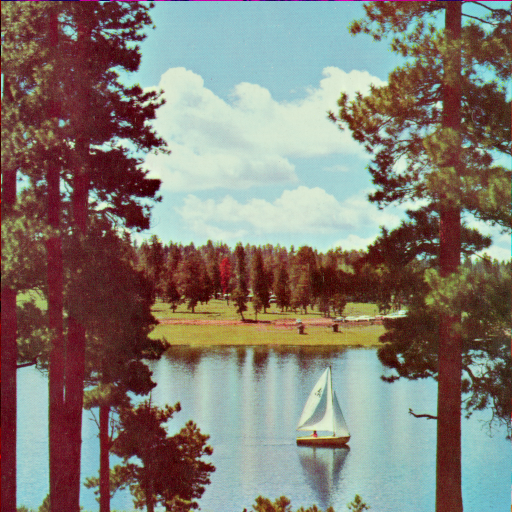

In [41]:
using Plots, Images, TestImages
img = float.(testimage("lake_color"))
channels = channelview(img)
display(channels[1,:,:]) # red channel
mosaicview(img; nrow=1, npad=10)

To demonstrate the effect of SVD compression, we create a function for low-rank matrix approximation given an SVD, and apply it for k = 10, 25, 50 singular values from our image.


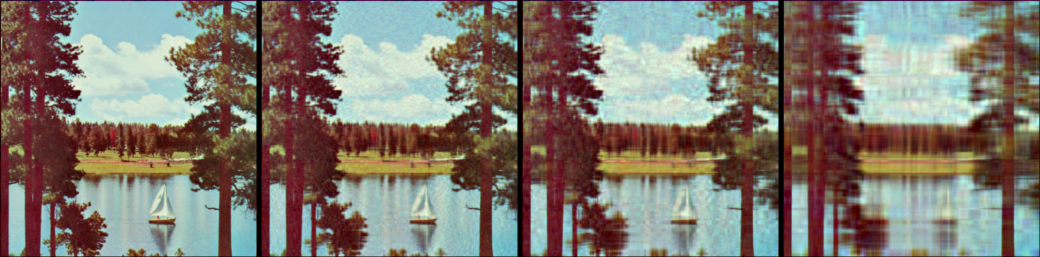

In [43]:
using LinearAlgebra, Plots

function rank_approx(F::SVD, k) # truncate after k SVs
    U, S, V = F
    M = U[:, 1:k] * diagm(S[1:k]) * V[:, 1:k]'
    clamp01!(M)
end

svdfactors = svd.(eachslice(channels; dims=1)) # SVD each channel
imgs = map((50, 25, 10)) do k
    colorview(RGB, rank_approx.(svdfactors, k)...)
end
mosaicview(img, imgs...; nrow=1, npad=10)

The first compressed image is slightly grainier than the first image. A lot of detail is lost in the second image, but it still somewhat resembles the original. The last image has large square artifacts which resulted from mixing heterogenous features in our data into the same colour.

As you can see from the log-plot below, the singular values below k = 100 were critical to the quality of our image, while the singular values after around 450 provide a negligible impact.


512-element Vector{Float32}:
 270.4683
  29.716951
  18.986387
  15.884753
  14.599182
  13.25404
  11.5733595
  11.291518
  10.244446
   8.420564
   7.8121157
   7.61801
   6.7959213
   ⋮
   0.016131999
   0.015282323
   0.014597718
   0.0114980955
   0.009608447
   0.008617903
   0.008037821
   0.0071701864
   0.006182685
   0.0038569106
   0.0027810237
   0.0015856026

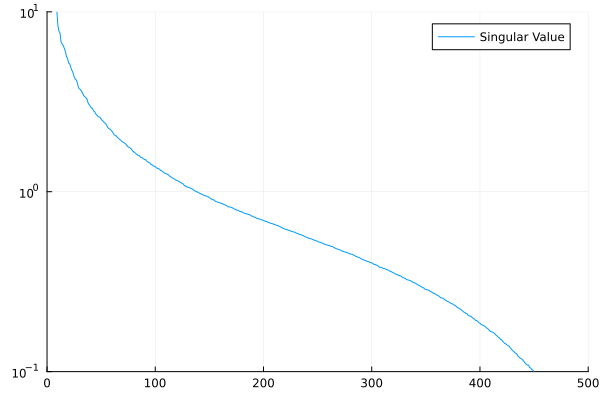

In [45]:
sv = svdfactors[1].S
display(sv)
Plots.plot(1:512,sv,xlims=(0,500),ylims=(0.1,10),yaxis=:log,label="Singular Value")

[Image Compression with Singular Value Decomposition](https://timbaumann.info/svd-image-compression-demo/) by Tim Baumann


The formula for the compressed size comes from the formula for the low-rank matrix approximation of A:


$A_k = U_k\Sigma_k V_k^T = \sigma_1 u_1 (v_1)^T + ... + \sigma_k u_k (v_k)^T$


In a grayscale image (one colour channel), we need to store 1 singular value $\sigma_i$, an m-long column vector $v_i$, and an n-long row vector $v^T_i$. For one SVD component, we need to store $(m + n + 1)$ floats.


For $k$ singular values, we need to store $k \cdot (m + n + 1)$ = $k \cdot m + k \cdot n + k$ floats.


For example, consider a 600 x 402 grayscale image whose matrix has been approximated using rank 10. The compressed size is 10 \* (600 + 402 + 1) = 10030 floats. The byte size to store one RGB24 (#000000 to #FFFFFF) value is 24 bits = 3 bytes, but we will express it in floats since we used that type in this exercise.

We can compute the size of the uncompressed image as follows: 600 \* 402 = 241200 floats. The compression ratio is 241200 floats / 4012 floats = 60.12, which means that our compressed image is 60.12x smaller than our original. This is a lossy compression method, meaning that data quality is permanently removed from our image to achieve a smaller size.


## Exercise 3: Point Cloud Alignment

Point cloud alignment (also known as Point-set registration) is the problem of aligning two noisy measurements of point clouds with some correspondence between them, that is, finding a spatial transformation which would alight point cloud A to point cloud B.

A point cloud is a set of points in $\mathbb{R}^3$. Point cloud data can be obtained from CT scans, LiDAR (light detection and ranging), and time-of-flight sensors. Point cloud alignment is a fundamental problem in computer vision and robotics. An example of this problem arising is when motion capture markers have their position measured from two sensors (two frames of reference or observers).


Consider the following equation:


$$P' = RP + t \vec{1}^T$$


$P$ and $P'$ are 3 by $n$ matrices representing n-many points in 3D space, $R$ is a 3D rotation matrix, and $t$ is a translation (movement) vector.


Note that the **cost function** (function to minimize) for linear least squares is:


$$r^2 = \sum_{i = 1}^n (y_i - \hat{y_i})^2$$


#### Arun's Method


We solve this problem using an optimization method called [Arun's Method](https://jingnanshi.com/blog/arun_method_for_3d_reg.html#fn.2), which is an SVD-based non-iterative least-squares approach to align two point clouds.


For Arun's Method, the cost function is:


$$\Sigma^2 = \sum_{i=1}^n ||p_i' - (Rp_i + t)||^2$$


where $p_i \in P$ and $p_i' \in P'$. We will use $p_c$ and $p_c'$ to represent the centroids of each cloud. We will also use hats for our transformation estimates. $\hat{R}$ is our estimated rotation matrix, and $\hat{t}$ is the estimated translation.


**Optional**: The proof for this method can be found in the above link.


**Step 1**: We compute our two centroids as center of masses (algebraic average of the points coordinates) and proceeds as follows:

$q_i = p_i - p_c$ and $q_i' = p_i' - p_c'$ for all $0 \leq i \leq n$. In other words, we compute the distances from each point to the centroid of its cloud.


**Step 2**: We compute $H$, a 3 by 3 matrix:

$H = \sum\_{i=1}^n q_i (q_i')^T $


**Step 3**: Find the SVD of H

$H = U \Sigma V^T $


**Step 4**: We calculate our rotation estimate $\hat{R} = VU^T$


**Step 5**: If $det(\hat{R}) \neq 1$, then this computation has failed.


**Step 6**: We compute our translation estimate $\hat{t} = p_c' - \hat{R}p_c$. That is, translation between our two point clouds can be found after rotating $P$ to match $P'$, then finding the vector difference between the centroids of the two clouds.


#### Implementation


**Note**: To interact with this section, you need to install PlyIO in the Julia Terminal by importing Pkg then running `Pkg.add("PlyIO")`. Additionally, you will need the .ply file from [Stanford's 3D Scanning Repository](https://graphics.stanford.edu/data/3Dscanrep/) or from the repl.it on [this site](https://jingnanshi.com/blog/arun_method_for_3d_reg.html).


Here is Arun's method implemented in Julia:


In [73]:
using LinearAlgebra
using Statistics

function arun(A, B)
    """
    Solve 3D registration using Arun's method: B = RA + t
    """
    N = size(A, 2)
    @assert size(B, 2) == N

    # Calculate centroids
    A_centroid = mean(A, dims=2)
    B_centroid = mean(B, dims=2)

    # Calculate the vectors from centroids
    A_prime = A .- A_centroid
    B_prime = B .- B_centroid

    # Rotation estimation
    H = zeros(3, 3)
    for i in 1:N
        ai = A_prime[:, i]
        bi = B_prime[:, i]
        H = H .+ (ai * bi')
    end
    U, S, Vt = svd(H)
    # R = Vt'diagm([1.0; 1.0; det(Vt')]) * U'
    R = Vt*U'

    # Translation estimation
    t = B_centroid - R * A_centroid

    return R, t
end


arun (generic function with 1 method)

We can test this on the Stanford Bunny from the above link:


Arun's method


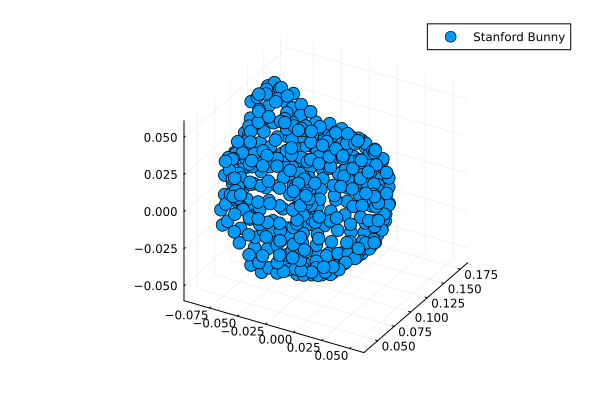

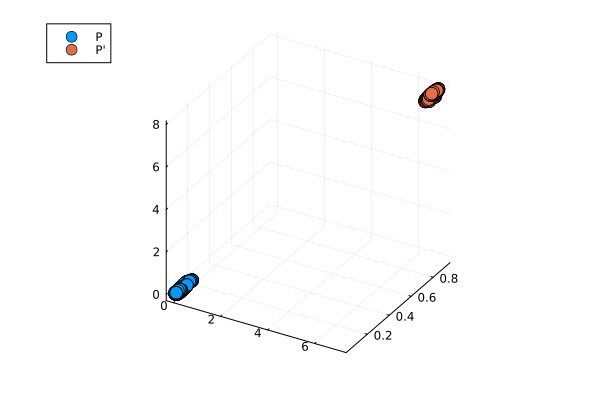

rotation determinant: 0.9999999999999996


3×453 Matrix{Float64}:
 7.02789   7.03913   7.05049   7.01182   …  6.93241   6.94702   6.93878
 0.845173  0.847909  0.828622  0.823127     0.868924  0.881636  0.874145
 7.86272   7.87119   7.91011   7.8543       7.89233   7.90706   7.90042

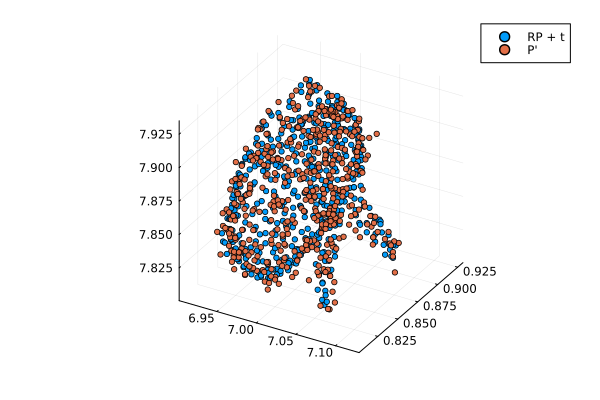

Actual rotation:
[-0.582030251823278 0.735035901781433 -0.3477973678090265; -0.4648411781940027 -0.6516802353839639 -0.5993626196761965; -0.6672057141674845 -0.18717663823847547 0.7209725661077542]
Actual translation:
Float32[6.918564; 0.9161705; 7.8617616;;]
Est. rotation:
[-0.5811724368173331 0.7358964982826629 -0.3474117765694156; -0.4650607652157706 -0.6506720096314258 -0.6002869484997349; -0.6678001821957854 -0.18730264199288896 0.7203892260172684]
Est. translation:
[6.918589974726717; 0.9159268803548014; 7.86181935332871;;]


In [75]:
using LinearAlgebra
using Statistics
#import Pkg; Pkg.add("PlyIO")
#Pkg.add("Rotations")
using Rotations
using PlyIO
using Plots

function load_ply2(filename)
    plydata = load_ply(filename)
    N = size(plydata["vertex"]["x"], 1)
    pc = zeros(Float32, 3, N)
    pc[1, :] .= Float32.(plydata["vertex"]["x"])
    pc[2, :] .= Float32.(plydata["vertex"]["y"])
    pc[3, :] .= Float32.(plydata["vertex"]["z"])
    return pc
end

println("Arun's method")

pc = load_ply2("bun_zipper_res4.ply")

# Apply random transformation
# R_actual = rand(Float32, 3, 3)
R_actual = rand(RotMatrix{3})
t_actual = rand(Float32, 3, 1) * 10
pc_transformed = R_actual * pc .+ t_actual .+ randn(size(pc))*0.005

# Convert to Float32
pc = Float32.(pc)
pc_transformed = Float32.(pc_transformed)

plt3d = Plots.plot(pc[1, :],pc[2, :],pc[3, :],seriestype=:scatter, markersize = 7, label="Stanford Bunny");
display(plt3d)
plt3d = Plots.plot([pc[1, :] pc_transformed[1, :]],[pc[2, :] pc_transformed[2, :]],[pc[3, :] pc_transformed[3, :]],seriestype=:scatter, markersize = 7, label=["P" "P'"]);
display(plt3d)

R_est, t_est = arun(pc, pc_transformed)

newpc = R_est * pc .+ t_est
println("rotation determinant: ", det(R_est))
display(newpc)
plt3d = Plots.plot([newpc[1, :] pc_transformed[1, :]],[newpc[2, :] pc_transformed[2, :]],[newpc[3, :] pc_transformed[3, :]],seriestype=:scatter, markersize = 3, label=["RP + t" "P'"]);
display(plt3d)
println("===============================")
println("Actual rotation:")
println(R_actual)
println("Actual translation:")
println(t_actual)
println("===============================")
println("Est. rotation:")
println(R_est)
println("Est. translation:")
println(t_est)


In [76]:
det(R_est)

0.9999999999999996